Try to fit $P(\log\;SSFR)$ distribution of galaxies using Gaussian Mixture Models

In [33]:
import numpy as np 
import sklearn.mixture as Mix
from scipy.stats import multivariate_normal as MNorm

import matplotlib.pyplot as plt
%matplotlib inline

#--- local --- 
import env
import catalogs as Cats

First lets import a catalog

In [34]:
jlt = Cats.Catalog()
logm, logsfr, w = jlt.Read('tinkergroup')

------  tinkergroup  ------
3  of  12344  galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.


Lets focus on a specific mass range $10^{10} - 10^{10.2}$

In [35]:
inmbin = np.where((logm > 10.) & (logm < 10.2))

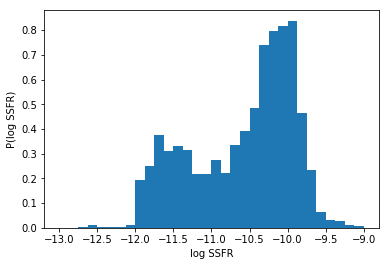

In [36]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(logsfr[inmbin] - logm[inmbin], range=[-13., -9.], bins=32, normed=True)
sub.set_xlabel('log SSFR')
sub.set_ylabel('P(log SSFR)')

Now lets Gaussian "mix" it up!

In [37]:
X = logsfr[inmbin] - logm[inmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 3273.69247198
2  components, BIC = 3250.69516057
1  components, BIC = 3752.76489513


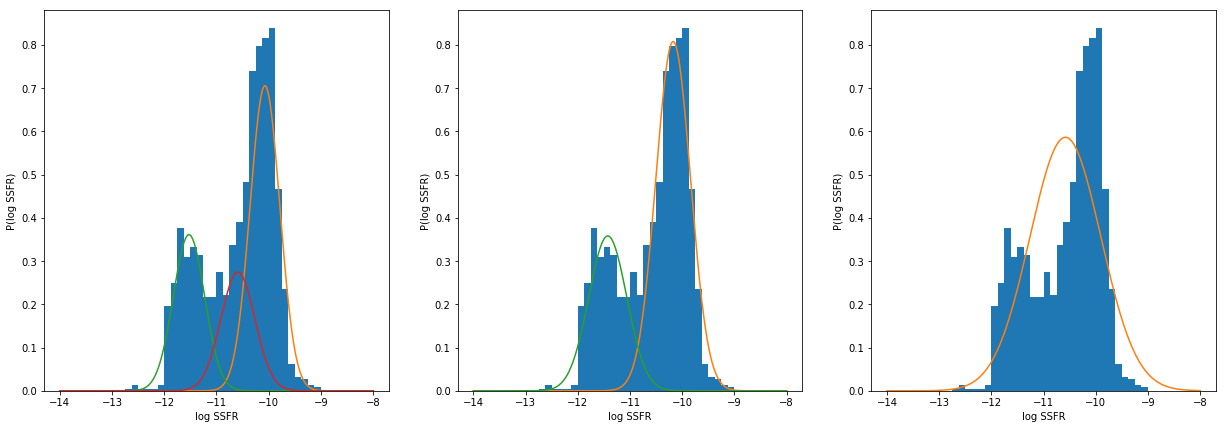

In [38]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

In [39]:
lowmbin = np.where((logm > 9.7) & (logm < 9.9) & (logsfr  > -14+logm) & (logsfr  < -8+logm))

In [40]:
X = logsfr[lowmbin] - logm[lowmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 3012.57507202
2  components, BIC = 2996.28584988
1  components, BIC = 3655.90772194


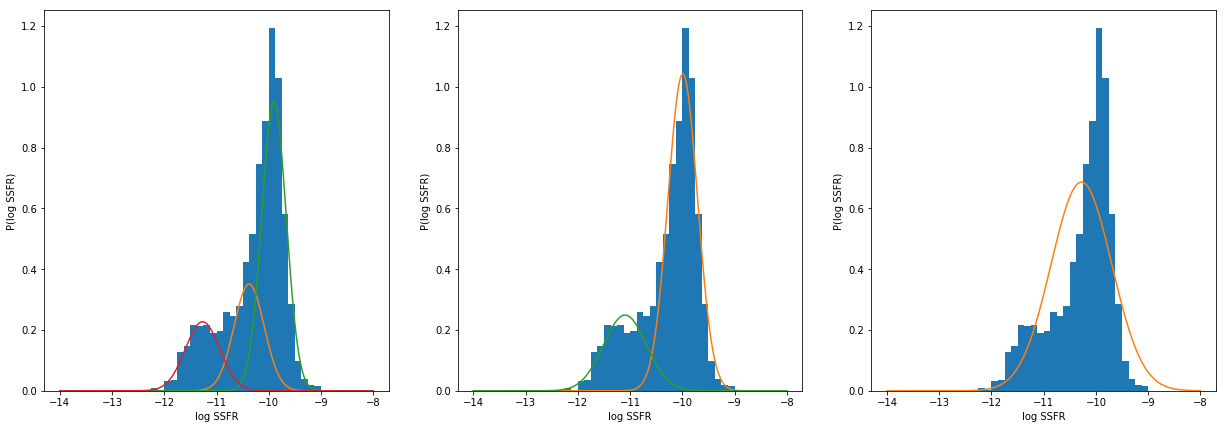

In [41]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

In [42]:
highmbin = np.where((logm > 11.4) & (logm < 11.6) & (logsfr  > -14+logm) & (logsfr  < -8+logm))
print len(highmbin[0])

107


In [43]:
X = logsfr[highmbin] - logm[highmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 135.717592171
2  components, BIC = 125.047783285
1  components, BIC = 182.000559864


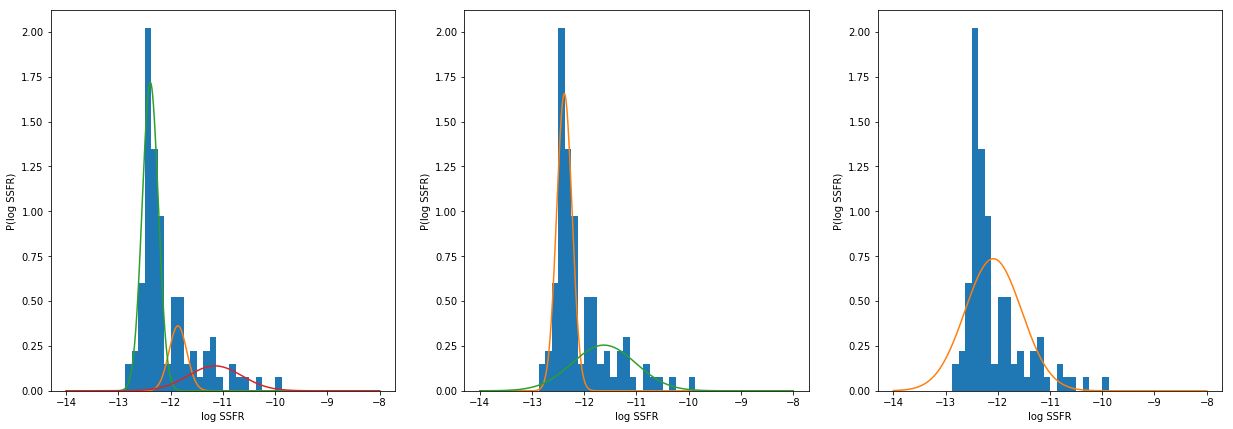

In [44]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

This seems promising for high masses. Lets try the NSA

In [13]:
nsa = Cats.Catalog()
logm, logsfr, w = nsa.Read('nsa_dickey')

------  nsa_dickey  ------
53  of  14998  galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.


(-4.0, 2.0)

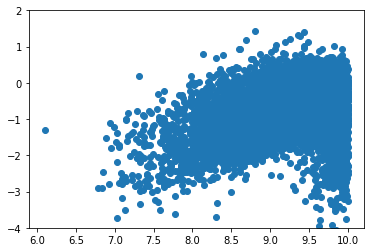

In [15]:
plt.scatter(logm, logsfr)
plt.ylim([-4., 2.])

In [21]:
inmbin = np.where((logm > 8.5) & (logm < 8.7) & (logsfr > logm -15) & (logsfr < logm - 8) )

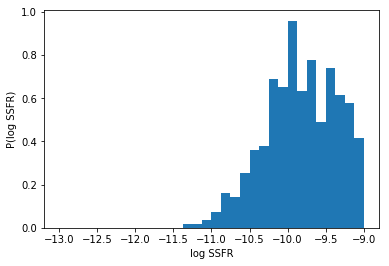

In [22]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(logsfr[inmbin] - logm[inmbin], range=[-13., -9.], bins=32, normed=True)
sub.set_xlabel('log SSFR')
sub.set_ylabel('P(log SSFR)')

In [23]:
X = logsfr[inmbin] - logm[inmbin]
X = np.reshape(X, (-1,1))

3  components, BIC = 994.137351453
2  components, BIC = 974.69462255
1  components, BIC = 963.959115879


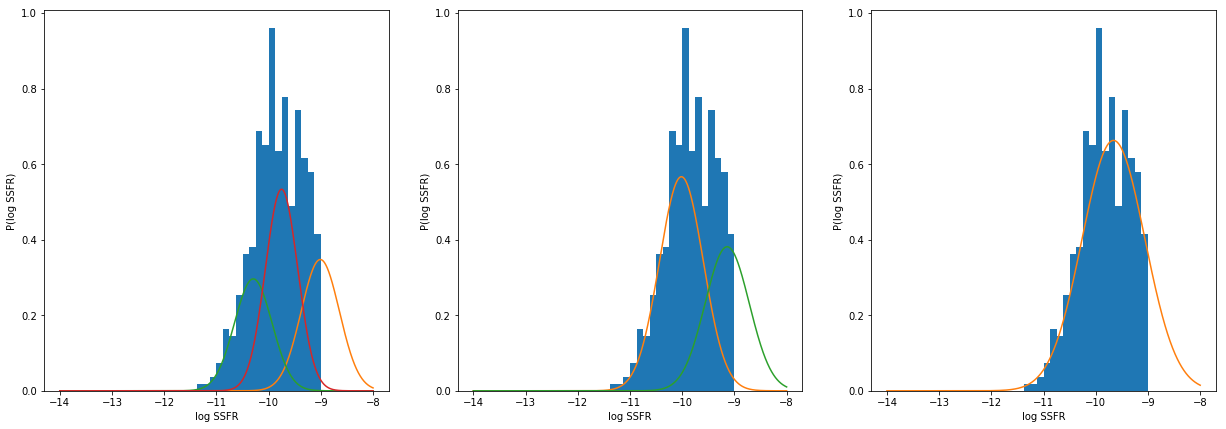

In [24]:
fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

[ 0.54292565  0.04358822  0.41348613]
3  components, BIC = 3240.55905949
[ 0.18524738  0.81475262]
2  components, BIC = 3267.83219164
[ 1.]
1  components, BIC = 3660.04358499


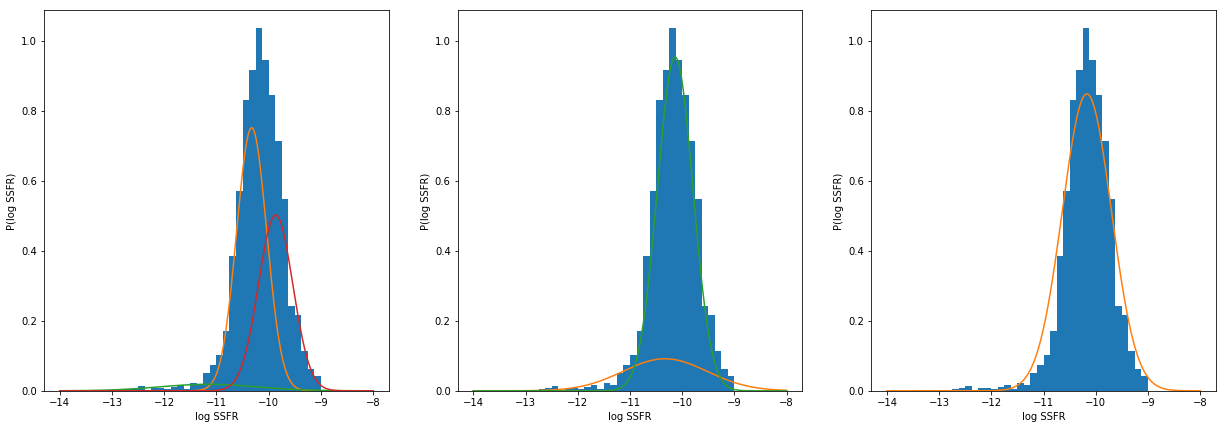

In [29]:
inmbin = np.where((logm > 9.5) & (logm < 9.7) & (logsfr > logm -15) & (logsfr < logm - 8))
X = logsfr[inmbin] - logm[inmbin]
X = np.reshape(X, (-1,1))

fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    print gmm.weights_
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)

3  components, BIC = 413.087491993
2  components, BIC = 396.098560683
1  components, BIC = 388.764889513


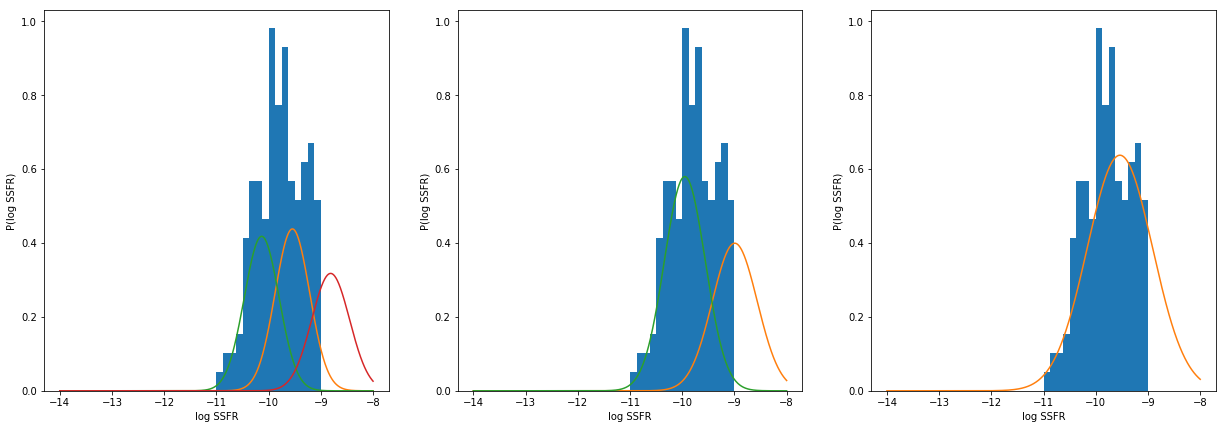

In [27]:
inmbin = np.where((logm > 8) & (logm < 8.2) & (logsfr > logm -15) & (logsfr < logm - 8))
X = logsfr[inmbin] - logm[inmbin]
X = np.reshape(X, (-1,1))

fig = plt.figure(figsize=(21,7))
for i_n, n in enumerate([3,2,1]): 
    gmm = Mix.GaussianMixture(n_components=n)
    gmm.fit(X)
    sub = fig.add_subplot(1,3,i_n+1)
    _ = sub.hist(X, range=[-13., -9.], bins=32, normed=True)
    x = np.linspace(-14., -8., 1000)
    for i in range(len(gmm.weights_)): 
        sub.plot(x, gmm.weights_[i]*MNorm.pdf(x, gmm.means_.flatten()[i], gmm.covariances_.flatten()[i]))
    sub.set_xlabel('log SSFR')
    sub.set_ylabel('P(log SSFR)')
    
    print n, ' components, BIC =', gmm.bic(X)